In [91]:
import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
symbol = "BTCUSDT"
df = pd.read_csv(f"datasets/{symbol}.csv")

In [46]:
df

,time_open,low,close,volume,high,open,number_of_trades,time_close,symbol
0,2024-07-13 18:14:00,58802.00,58802.00,0.068970,58802.01,58802.00,50,2024-07-13 18:14:59,BTCUSDT
1,2024-07-13 18:13:00,58791.40,58802.00,10.884170,58810.00,58795.82,889,2024-07-13 18:13:59,BTCUSDT
2,2024-07-13 18:12:00,58781.14,58795.82,5.881740,58795.82,58789.99,552,2024-07-13 18:12:59,BTCUSDT
3,2024-07-13 18:11:00,58786.05,58790.00,11.794740,58803.25,58803.25,597,2024-07-13 18:11:59,BTCUSDT
4,2024-07-13 18:10:00,58764.00,58803.25,7.688330,58803.25,58767.16,3806,2024-07-13 18:10:59,BTCUSDT
...,...,...,...,...,...,...,...,...,...
3623752,2017-08-17 07:04:00,4261.48,4261.48,0.140796,4261.48,4261.48,1,2017-08-17 07:05:00,BTCUSDT
3623753,2017-08-17 07:03:00,4261.48,4261.48,0.012008,4261.48,4261.48,3,2017-08-17 07:04:00,BTCUSDT
3623754,2017-08-17 07:02:00,4280.56,4280.56,0.261074,4280.56,4280.56,2,2017-08-17 07:03:00,BTCUSDT
3623755,2017-08-17 07:01:00,4261.48,4261.48,0.000000,4261.48,4261.48,0,2017-08-17 07:02:00,BTCUSDT


In [47]:
len(df)

3623757

In [48]:
df.set_index(pd.to_datetime(df.time_open), inplace=True)
df.drop("time_open", axis=1, inplace=True)

In [49]:
df

,low,close,volume,high,open,number_of_trades,time_close,symbol
time_open,,,,,,,,
2024-07-13 18:14:00,58802.00,58802.00,0.068970,58802.01,58802.00,50,2024-07-13 18:14:59,BTCUSDT
2024-07-13 18:13:00,58791.40,58802.00,10.884170,58810.00,58795.82,889,2024-07-13 18:13:59,BTCUSDT
2024-07-13 18:12:00,58781.14,58795.82,5.881740,58795.82,58789.99,552,2024-07-13 18:12:59,BTCUSDT
2024-07-13 18:11:00,58786.05,58790.00,11.794740,58803.25,58803.25,597,2024-07-13 18:11:59,BTCUSDT
2024-07-13 18:10:00,58764.00,58803.25,7.688330,58803.25,58767.16,3806,2024-07-13 18:10:59,BTCUSDT
...,...,...,...,...,...,...,...,...
2017-08-17 07:04:00,4261.48,4261.48,0.140796,4261.48,4261.48,1,2017-08-17 07:05:00,BTCUSDT
2017-08-17 07:03:00,4261.48,4261.48,0.012008,4261.48,4261.48,3,2017-08-17 07:04:00,BTCUSDT
2017-08-17 07:02:00,4280.56,4280.56,0.261074,4280.56,4280.56,2,2017-08-17 07:03:00,BTCUSDT


In [50]:
mpf.plot(df.iloc[:240][::-1], type='candle', volume=True, savefig=f"datasets/{symbol}-last 4H in 1m.png")

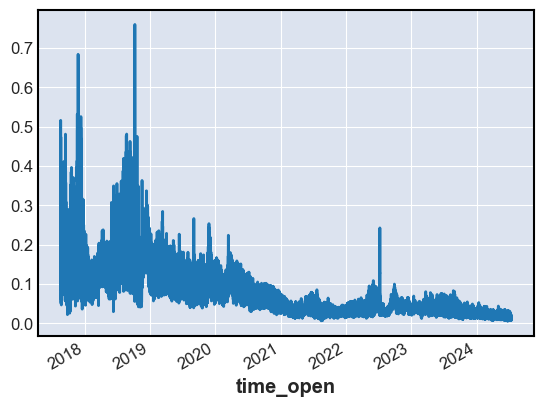

In [51]:
v_nt = (df.volume / df.number_of_trades).dropna()
v_nt.rolling(60).mean().plot()
plt.savefig(f"datasets/{symbol}-volume to trades-1H.png", dpi=400)

In [52]:
# import plotly.graph_objects as go


# fig = go.Figure(
#     data=[
#         go.Candlestick(
#             x=df[:240:-1].index,
#             open=df[:240:-1].open,
#             high=df[:240:-1].high,
#             low=df[:240:-1].low,
#             close=df[:240:-1].close
#         )
#     ]
# )

# fig.show(renderer="browser")

,low,close,volume,high,open,number_of_trades,time_close,symbol
time_open,,,,,,,,
2024-07-13 18:14:00,58802.00,58802.00,0.068970,58802.01,58802.00,50,2024-07-13 18:14:59,BTCUSDT
2024-07-13 18:13:00,58791.40,58802.00,10.884170,58810.00,58795.82,889,2024-07-13 18:13:59,BTCUSDT
2024-07-13 18:12:00,58781.14,58795.82,5.881740,58795.82,58789.99,552,2024-07-13 18:12:59,BTCUSDT
2024-07-13 18:11:00,58786.05,58790.00,11.794740,58803.25,58803.25,597,2024-07-13 18:11:59,BTCUSDT
2024-07-13 18:10:00,58764.00,58803.25,7.688330,58803.25,58767.16,3806,2024-07-13 18:10:59,BTCUSDT
...,...,...,...,...,...,...,...,...
2017-08-17 07:04:00,4261.48,4261.48,0.140796,4261.48,4261.48,1,2017-08-17 07:05:00,BTCUSDT
2017-08-17 07:03:00,4261.48,4261.48,0.012008,4261.48,4261.48,3,2017-08-17 07:04:00,BTCUSDT
2017-08-17 07:02:00,4280.56,4280.56,0.261074,4280.56,4280.56,2,2017-08-17 07:03:00,BTCUSDT


In [56]:
if df.index[0] > df.index[1]:
    df = df.iloc[::-1].copy()
df

,low,close,volume,high,open,number_of_trades,time_close,symbol
time_open,,,,,,,,
2017-08-17 07:00:00,4261.48,4261.48,1.775183,4261.48,4261.48,3,2017-08-17 07:01:00,BTCUSDT
2017-08-17 07:01:00,4261.48,4261.48,0.000000,4261.48,4261.48,0,2017-08-17 07:02:00,BTCUSDT
2017-08-17 07:02:00,4280.56,4280.56,0.261074,4280.56,4280.56,2,2017-08-17 07:03:00,BTCUSDT
2017-08-17 07:03:00,4261.48,4261.48,0.012008,4261.48,4261.48,3,2017-08-17 07:04:00,BTCUSDT
2017-08-17 07:04:00,4261.48,4261.48,0.140796,4261.48,4261.48,1,2017-08-17 07:05:00,BTCUSDT
...,...,...,...,...,...,...,...,...
2024-07-13 18:10:00,58764.00,58803.25,7.688330,58803.25,58767.16,3806,2024-07-13 18:10:59,BTCUSDT
2024-07-13 18:11:00,58786.05,58790.00,11.794740,58803.25,58803.25,597,2024-07-13 18:11:59,BTCUSDT
2024-07-13 18:12:00,58781.14,58795.82,5.881740,58795.82,58789.99,552,2024-07-13 18:12:59,BTCUSDT


In [57]:
df["SMA_60"] = df.close.rolling(60).mean()

<Axes: xlabel='time_open'>

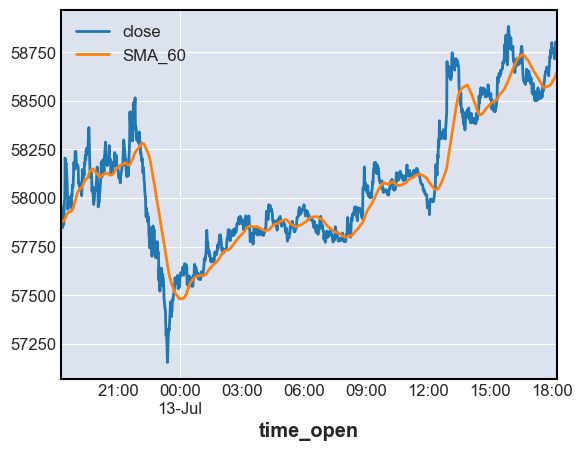

In [58]:
df[["close", "SMA_60"]][-1440:].plot()

In [59]:
df_last_day = df[-240:]

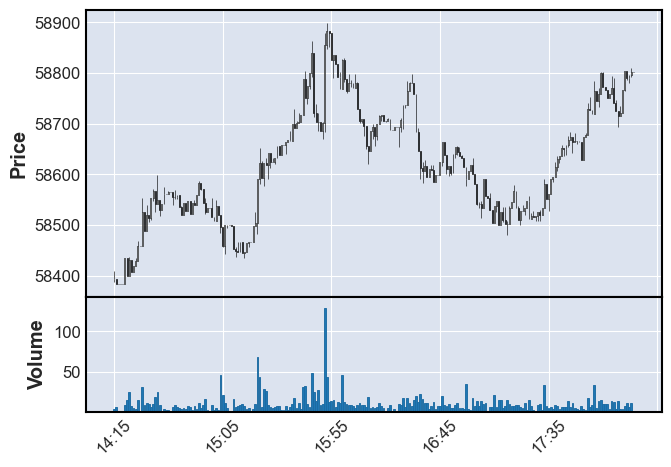

In [60]:
mpf.plot(df_last_day, type='candle', volume=True)

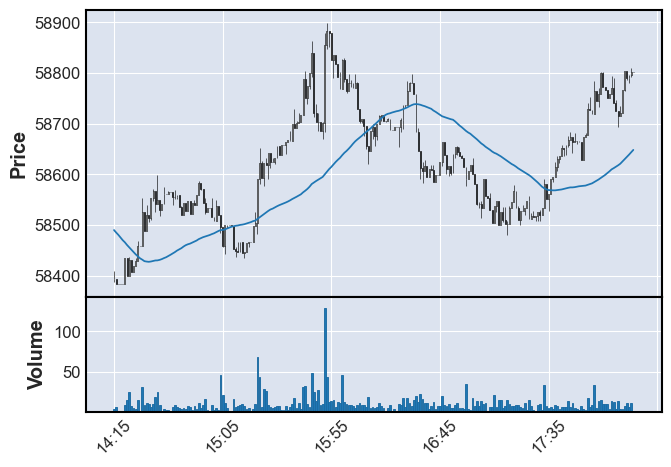

In [61]:
add_plot = mpf.make_addplot(df_last_day["SMA_60"])
mpf.plot(df_last_day, type='candle', addplot=add_plot ,volume=True)

In [62]:
df["SMA_15"] = df.close.rolling(15).mean()
df["SMA_240"] = df.close.rolling(240).mean()

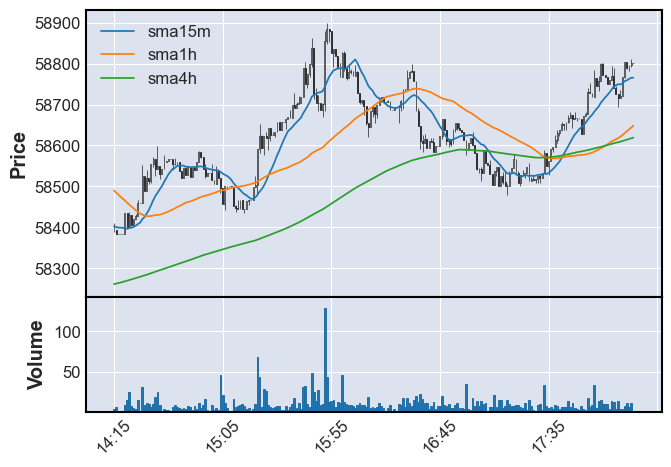

In [95]:
add_plots = [
    mpf.make_addplot(df[-240:]["SMA_15"], label="sma15m"),
    mpf.make_addplot(df[-240:]["SMA_60"], label="sma1h"),
    mpf.make_addplot(df[-240:]["SMA_240"], label="sma4h")
]
mpf.plot(df[-240:], type='candle', addplot=add_plots ,volume=True)

<Axes: xlabel='time_open'>

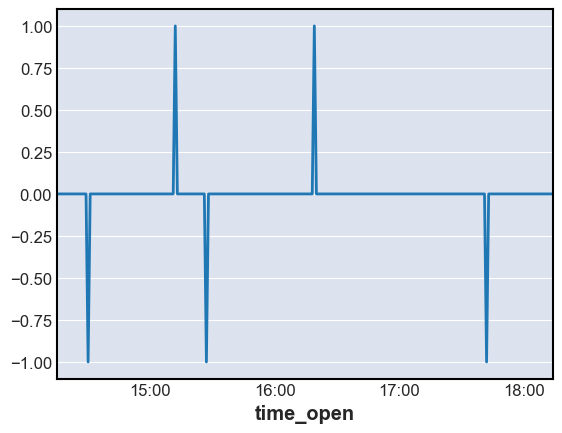

In [100]:
df.X_SMA_15_60[-240:].plot()

In [108]:
df["X_SMA_15_60"] = np.where(
    (df.SMA_15 < df.SMA_60) & (df.SMA_15.shift(1) > df.SMA_60.shift(1)),
    -1,
    np.where(
        (df.SMA_15 > df.SMA_60) & (df.SMA_15.shift(1) < df.SMA_60.shift(1)),
        1,
        0
    )
)
df["X_SMA_15_60"]

time_open
2017-08-17 07:00:00    0
2017-08-17 07:01:00    0
2017-08-17 07:02:00    0
2017-08-17 07:03:00    0
2017-08-17 07:04:00    0
                      ..
2024-07-13 18:10:00    0
2024-07-13 18:11:00    0
2024-07-13 18:12:00    0
2024-07-13 18:13:00    0
2024-07-13 18:14:00    0
Name: X_SMA_15_60, Length: 3623757, dtype: int64

In [109]:
df_trades = df[df.X_SMA_15_60 != 0].copy()
df_trades

,low,close,volume,high,open,number_of_trades,time_close,symbol,SMA_60,SMA_15,SMA_240,X_SMA_15_60
time_open,,,,,,,,,,,,
2017-08-17 08:41:00,4291.37,4291.37,0.000000,4291.37,4291.37,0,2017-08-17 08:42:00,BTCUSDT,4314.519167,4314.274000,NaN,-1
2017-08-17 09:05:00,4318.39,4318.39,0.054200,4318.39,4318.39,1,2017-08-17 09:06:00,BTCUSDT,4313.999667,4315.304000,NaN,1
2017-08-17 10:02:00,4324.35,4324.35,0.000000,4324.35,4324.35,0,2017-08-17 10:03:00,BTCUSDT,4327.727833,4327.042667,NaN,-1
2017-08-17 10:58:00,4334.00,4334.00,0.105623,4334.00,4334.00,1,2017-08-17 10:59:00,BTCUSDT,4310.610667,4311.456667,NaN,1
2017-08-17 12:01:00,4360.69,4360.69,0.000000,4360.69,4360.69,0,2017-08-17 12:02:00,BTCUSDT,4360.732000,4360.691333,4328.431000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-13 14:30:00,58488.00,58520.01,11.726920,58539.94,58488.01,751,2024-07-13 14:30:59,BTCUSDT,58427.852500,58433.578000,58284.495500,1
2024-07-13 15:12:00,58445.99,58446.00,7.879800,58467.21,58447.99,724,2024-07-13 15:12:59,BTCUSDT,58499.121833,58496.507333,58356.907458,-1
2024-07-13 15:27:00,58612.01,58625.45,6.471630,58642.00,58641.99,551,2024-07-13 15:27:59,BTCUSDT,58530.711333,58537.885333,58382.342375,1


In [110]:
df_trades["delta"] = df_trades.close.diff()
df_trades

,low,close,volume,high,open,number_of_trades,time_close,symbol,SMA_60,SMA_15,SMA_240,X_SMA_15_60,delta
time_open,,,,,,,,,,,,,
2017-08-17 08:41:00,4291.37,4291.37,0.000000,4291.37,4291.37,0,2017-08-17 08:42:00,BTCUSDT,4314.519167,4314.274000,NaN,-1,NaN
2017-08-17 09:05:00,4318.39,4318.39,0.054200,4318.39,4318.39,1,2017-08-17 09:06:00,BTCUSDT,4313.999667,4315.304000,NaN,1,27.02
2017-08-17 10:02:00,4324.35,4324.35,0.000000,4324.35,4324.35,0,2017-08-17 10:03:00,BTCUSDT,4327.727833,4327.042667,NaN,-1,5.96
2017-08-17 10:58:00,4334.00,4334.00,0.105623,4334.00,4334.00,1,2017-08-17 10:59:00,BTCUSDT,4310.610667,4311.456667,NaN,1,9.65
2017-08-17 12:01:00,4360.69,4360.69,0.000000,4360.69,4360.69,0,2017-08-17 12:02:00,BTCUSDT,4360.732000,4360.691333,4328.431000,-1,26.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-13 14:30:00,58488.00,58520.01,11.726920,58539.94,58488.01,751,2024-07-13 14:30:59,BTCUSDT,58427.852500,58433.578000,58284.495500,1,60.60
2024-07-13 15:12:00,58445.99,58446.00,7.879800,58467.21,58447.99,724,2024-07-13 15:12:59,BTCUSDT,58499.121833,58496.507333,58356.907458,-1,-74.01
2024-07-13 15:27:00,58612.01,58625.45,6.471630,58642.00,58641.99,551,2024-07-13 15:27:59,BTCUSDT,58530.711333,58537.885333,58382.342375,1,179.45


In [111]:
df_trades["profit"] = df_trades.X_SMA_15_60 * df_trades.delta
df_trades

,low,close,volume,high,open,number_of_trades,time_close,symbol,SMA_60,SMA_15,SMA_240,X_SMA_15_60,delta,profit
time_open,,,,,,,,,,,,,,
2017-08-17 08:41:00,4291.37,4291.37,0.000000,4291.37,4291.37,0,2017-08-17 08:42:00,BTCUSDT,4314.519167,4314.274000,NaN,-1,NaN,NaN
2017-08-17 09:05:00,4318.39,4318.39,0.054200,4318.39,4318.39,1,2017-08-17 09:06:00,BTCUSDT,4313.999667,4315.304000,NaN,1,27.02,27.02
2017-08-17 10:02:00,4324.35,4324.35,0.000000,4324.35,4324.35,0,2017-08-17 10:03:00,BTCUSDT,4327.727833,4327.042667,NaN,-1,5.96,-5.96
2017-08-17 10:58:00,4334.00,4334.00,0.105623,4334.00,4334.00,1,2017-08-17 10:59:00,BTCUSDT,4310.610667,4311.456667,NaN,1,9.65,9.65
2017-08-17 12:01:00,4360.69,4360.69,0.000000,4360.69,4360.69,0,2017-08-17 12:02:00,BTCUSDT,4360.732000,4360.691333,4328.431000,-1,26.69,-26.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-13 14:30:00,58488.00,58520.01,11.726920,58539.94,58488.01,751,2024-07-13 14:30:59,BTCUSDT,58427.852500,58433.578000,58284.495500,1,60.60,60.60
2024-07-13 15:12:00,58445.99,58446.00,7.879800,58467.21,58447.99,724,2024-07-13 15:12:59,BTCUSDT,58499.121833,58496.507333,58356.907458,-1,-74.01,74.01
2024-07-13 15:27:00,58612.01,58625.45,6.471630,58642.00,58641.99,551,2024-07-13 15:27:59,BTCUSDT,58530.711333,58537.885333,58382.342375,1,179.45,179.45


In [112]:
summary_profit = df_trades.profit.sum()
summary_profit

146253.15999999855


In [115]:
df_trades["acc_profit"] = df_trades.profit.cumsum()
df_trades

,low,close,volume,high,open,number_of_trades,time_close,symbol,SMA_60,SMA_15,SMA_240,X_SMA_15_60,delta,profit,acc_profit
time_open,,,,,,,,,,,,,,,
2017-08-17 08:41:00,4291.37,4291.37,0.000000,4291.37,4291.37,0,2017-08-17 08:42:00,BTCUSDT,4314.519167,4314.274000,NaN,-1,NaN,NaN,NaN
2017-08-17 09:05:00,4318.39,4318.39,0.054200,4318.39,4318.39,1,2017-08-17 09:06:00,BTCUSDT,4313.999667,4315.304000,NaN,1,27.02,27.02,27.02
2017-08-17 10:02:00,4324.35,4324.35,0.000000,4324.35,4324.35,0,2017-08-17 10:03:00,BTCUSDT,4327.727833,4327.042667,NaN,-1,5.96,-5.96,21.06
2017-08-17 10:58:00,4334.00,4334.00,0.105623,4334.00,4334.00,1,2017-08-17 10:59:00,BTCUSDT,4310.610667,4311.456667,NaN,1,9.65,9.65,30.71
2017-08-17 12:01:00,4360.69,4360.69,0.000000,4360.69,4360.69,0,2017-08-17 12:02:00,BTCUSDT,4360.732000,4360.691333,4328.431000,-1,26.69,-26.69,4.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-13 14:30:00,58488.00,58520.01,11.726920,58539.94,58488.01,751,2024-07-13 14:30:59,BTCUSDT,58427.852500,58433.578000,58284.495500,1,60.60,60.60,146136.26
2024-07-13 15:12:00,58445.99,58446.00,7.879800,58467.21,58447.99,724,2024-07-13 15:12:59,BTCUSDT,58499.121833,58496.507333,58356.907458,-1,-74.01,74.01,146210.27
2024-07-13 15:27:00,58612.01,58625.45,6.471630,58642.00,58641.99,551,2024-07-13 15:27:59,BTCUSDT,58530.711333,58537.885333,58382.342375,1,179.45,179.45,146389.72


In [117]:
df_trades.describe()

,low,close,volume,high,open,number_of_trades,SMA_60,SMA_15,SMA_240,X_SMA_15_60,delta,profit,acc_profit
count,82076.000000,82076.000000,82076.000000,82076.000000,82076.000000,82076.000000,82076.000000,82076.000000,82072.000000,82076.000000,82075.000000,82075.000000,82075.000000
mean,23504.378518,23517.013521,46.725960,23529.543415,23517.083839,976.461353,23516.579271,23516.634268,23516.861181,-0.000024,0.662304,1.781945,56079.737213
std,18525.124808,18533.953288,95.783700,18542.853737,18534.082327,1817.795567,18533.372591,18533.425631,18533.174523,1.000006,178.438264,178.430595,71097.304455
min,2920.000000,2920.000000,0.000000,2920.000000,2920.000000,0.000000,2904.199833,2908.337333,2987.271375,-1.000000,-4934.030000,-4934.030000,-22632.010000
25%,8115.892500,8120.482500,9.813128,8124.960000,8120.025000,164.000000,8118.995917,8119.363833,8122.232219,-1.000000,-27.720000,-8.310000,-16303.875000
50%,17201.635000,17208.875000,20.689889,17217.960000,17208.955000,432.000000,17208.864417,17207.581000,17212.817958,-1.000000,0.350000,11.050000,20609.550000
75%,36650.385000,36675.145000,45.532060,36703.427500,36673.257500,986.000000,36679.560042,36677.966667,36695.296969,1.000000,29.680000,43.090000,132595.400000
max,73403.990000,73435.990000,5877.775450,73436.000000,73404.000000,107315.000000,73491.211833,73473.538667,73362.692333,1.000000,3995.820000,1856.580000,171336.070000


<Axes: xlabel='time_open'>

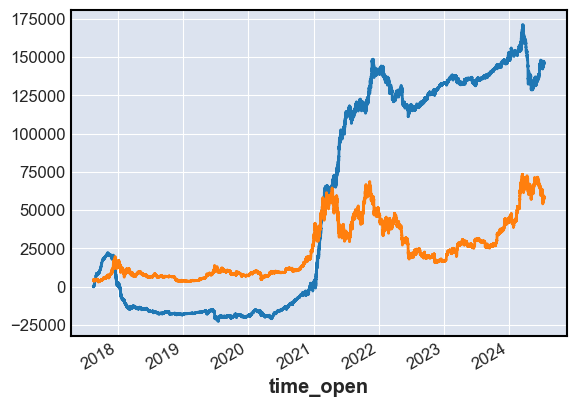

In [119]:
df_trades.acc_profit.plot()
df_trades.close.plot()